In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../dataset/books.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [6]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [7]:
len(df)

6810

Heatmap of missing values in dataset

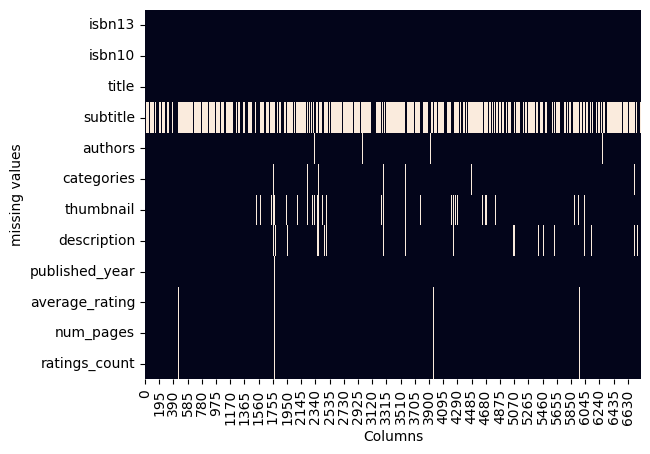

In [13]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(),cbar=False,ax=ax)

plt.xlabel("Columns")
plt.ylabel("missing values")

plt.show()

In [15]:
df['missing_description'] = np.where(df['description'].isna(),1,0)
df['age_of_book'] = 2025 - df['published_year']

In [17]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


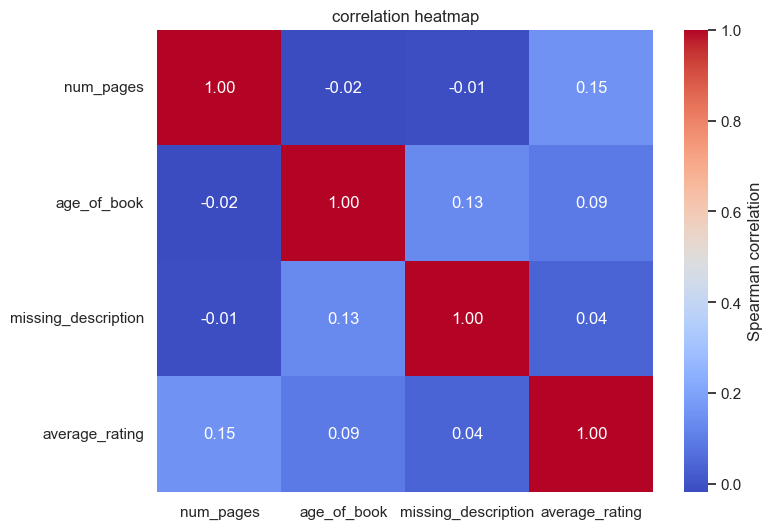

In [25]:
col_of_interest = ['num_pages','age_of_book','missing_description','average_rating']

corr_matrix = df[col_of_interest].corr(method = 'spearman')
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',cbar_kws={'label': 'Spearman correlation'})
heatmap.set_title('correlation heatmap')
plt.show()

Remove those dataset who as not description,num_pages,avg_rating,published_year 

In [28]:
book_missing = df[~(df['description'].isna()) &
   ~(df['num_pages'].isna()) &
   ~(df['average_rating'].isna()) &
   ~(df['published_year'].isna()) 
   ]

In [29]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [31]:
cat_miss = book_missing['categories'].value_counts().reset_index().sort_values("count",ascending=False)

In [38]:
cat_miss

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,English essays,1
527,Inventions,1
528,Building laws,1
529,LITERARY CRITICISM,1


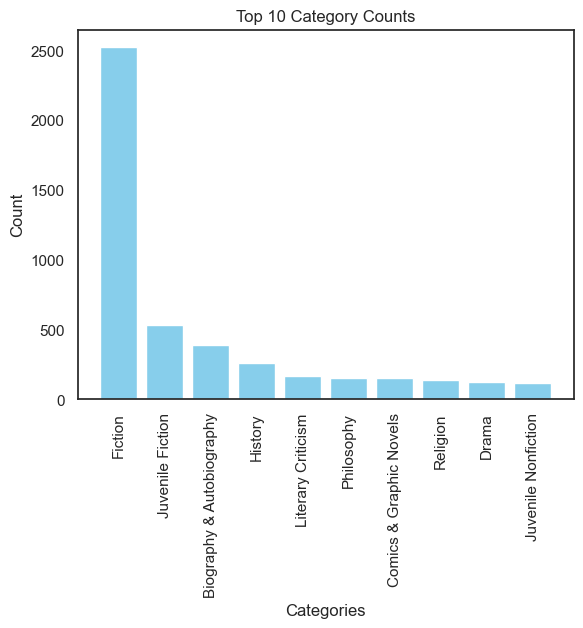

In [41]:
top_10 = cat_miss.nlargest(10, 'count')
plt.bar(top_10['categories'], top_10['count'], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Top 10 Category Counts')
plt.xticks(rotation=90)
plt.show()

Remove those description who has less word like len of 1.

In [ ]:
book_missing['words_in_description'] = book_missing['description'].str.split().str.len()

In [46]:
book_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_descriptio,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,45


In [ ]:
less_des_1_4 = book_missing.loc[book_missing['words_in_description'].between(1,4),'description']
less_des_1_4 , len(less_des_1_4)

(6                                           Donation.
 11                                     Fantasy-roman.
 748              Includes bibliographical references.
 770                             Bound For Oregon (PB)
 775                                No Marketing Blurb
 812                                No Marketing Blurb
 857                          First published in 1813.
 944                         Edited by Maurice Hindle.
 953                        DEFOE/ROBINSON CRUSOE (BC)
 954                             Edited by John Carey.
 962                         ALLEN/GETTING THINGS DONE
 1054                            GILBERT/EAT PRAY LOVE
 1056    "Graham Greene centennial, 1904-2004"--Cover.
 1060                   STEINBECK/GRAPES OF WRATH (BC)
 1346                                   Fantasy-roman.
 1546                                      Winter 2003
 1610                                      Winter 1999
 1813                             National bestseller.
 1981     

In [50]:
less_des_5_14 = book_missing.loc[book_missing['words_in_description'].between(5,14),'description']
less_des_5_14 , len(less_des_5_14)

(2       Volume Two of Stephen Donaldson's acclaimed se...
 38      Koko is Peter Straub's foray into the psycholo...
 70      A matter of life and death - and the Throne of...
 77                         Nonsense rhyming story. 4 yrs+
 84      A study guide for the novel There's a Boy in t...
                               ...                        
 6715    The first comprehensive guide to addressing Na...
 6726       Presents two complete novels from Henry James.
 6757                          Audio Book- unabriged on CD
 6776    Raymond Chandler meets The Exorcist. Classic n...
 6795    Book Of Five Rings is a Kodansha International...
 Name: description, Length: 308, dtype: object,
 308)

In [51]:
less_des_15_24 = book_missing.loc[book_missing['words_in_description'].between(15,24),'description']
less_des_15_24 , len(less_des_15_24)

(10      One of Sidney Sheldon's most popular and bests...
 32      Tells the story of three generations of Chines...
 36      A magical and fantastic collection of early st...
 57      A young drifter finds more than he bargained f...
 68      A new 'The Doors of Perception' for the 21st c...
                               ...                        
 6767    Everything from the fingerprints of the gods t...
 6782    Displays one of America's leading physicist's ...
 6783    Basics Illustration 01: Thinking Visually expl...
 6789    Provides an introduction to the American artis...
 6809    This is a jubilant and rewarding collection of...
 Name: description, Length: 947, dtype: object,
 947)

Now, we can see len of 25 it should be good for desc.

In [52]:
less_des_25_34 = book_missing.loc[book_missing['words_in_description'].between(25,34),'description']
less_des_25_34 , len(less_des_25_34)

(9       Kate Blackwell is an enigma and one of the mos...
 14      Available in the U.S. for the first time, this...
 20      It is 1937, and Charles Ashworth, a Canon to t...
 21      Reissue of the author's most famous and well-l...
 46      No one believes a little girl when she insists...
                               ...                        
 6760    Joel, an English teacher, has never really lik...
 6766    Discusses the historical and intellectual back...
 6775    Presents nearly one thousand recipes--from app...
 6779    Edited by the creator and executive producer o...
 6799    This book is the story of a young girl obsesse...
 Name: description, Length: 1229, dtype: object,
 1229)

remove less than 25 len of des.

In [54]:
book_missing_25_words = book_missing[book_missing['words_in_description']>=25]
len(book_missing_25_words)

5197

Now change the subtitle whose value is NaN

In [55]:
book_missing_25_words["title_and_subtitle"] = (
    np.where(book_missing_25_words['subtitle'].isna(), book_missing_25_words['title'],
             book_missing_25_words[['title','subtitle']].astype(str).agg(": ".join,axis=1)))

C:\Users\deep1\AppData\Local\Temp\ipykernel_3060\3581131852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = (


In [56]:
book_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_descriptio,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,75,The Problem of Pain


In [62]:
book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13','description']].astype(str).agg(" ".join,axis=1)

book_missing_25_words.head()

C:\Users\deep1\AppData\Local\Temp\ipykernel_3060\1093147260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13','description']].astype(str).agg(" ".join,axis=1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_descriptio,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


In [63]:
book_missing_25_words.drop(['subtitle','missing_description','words_in_descriptio','age_of_book',"words_in_description"],axis=1).to_csv("../dataset/books_clean.csv",index=False)

In [3]:
clean_book = pd.read_csv('../dataset/books_clean.csv')
clean_book.head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
